### Import library

In [10]:
import tensorflow as tf

### Loading the dataset and apply Preprocessing

In [11]:
img_height = 28 # mnist default size 28*28
img_width = 28 
batch_size = 32

# Loading the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "./mnist_dataset/",
    labels="inferred",
    label_mode="int",
    color_mode="grayscale",
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training"
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "./mnist_dataset/",
    labels="inferred",
    label_mode="int",
    color_mode="grayscale",
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation"
)

# Apply image normalization
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

Found 350 files belonging to 10 classes.
Using 280 files for training.


Found 350 files belonging to 10 classes.
Using 70 files for validation.


### Build ANN Model

In [12]:
num_classes = 10  # Number of output classes in Persian MNIST dataset

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(img_height, img_width)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
model.fit(train_ds, validation_data=test_ds, epochs=10)

# Evaluate the model
model.evaluate(test_ds)

Epoch 1/10
9/9 [==============================] - 1s 22ms/step - loss: 2.7937 - accuracy: 0.0786 - val_loss: 2.5612 - val_accuracy: 0.1143
Epoch 2/10
9/9 [==============================] - 0s 11ms/step - loss: 2.5167 - accuracy: 0.1000 - val_loss: 2.4519 - val_accuracy: 0.1286
Epoch 3/10
9/9 [==============================] - 0s 10ms/step - loss: 2.4124 - accuracy: 0.1179 - val_loss: 2.5385 - val_accuracy: 0.0714
Epoch 4/10
9/9 [==============================] - 0s 9ms/step - loss: 2.3502 - accuracy: 0.1357 - val_loss: 2.3407 - val_accuracy: 0.1143
Epoch 5/10
9/9 [==============================] - 0s 8ms/step - loss: 2.3266 - accuracy: 0.1107 - val_loss: 2.3385 - val_accuracy: 0.1143
Epoch 6/10
9/9 [==============================] - 0s 7ms/step - loss: 2.3241 - accuracy: 0.1607 - val_loss: 2.3229 - val_accuracy: 0.0857
Epoch 7/10
9/9 [==============================] - 0s 8ms/step - loss: 2.2669 - accuracy: 0.1357 - val_loss: 2.2869 - val_accuracy: 0.1714
Epoch 8/10
9/9 [===============

[2.2941572666168213, 0.11428571492433548]

### Plot Train and Test Accuracy and Loss in ANN

Epoch 1/10


c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


9/9 [==============================] - 1s 20ms/step - loss: 2.6625 - accuracy: 0.0964 - val_loss: 2.4591 - val_accuracy: 0.1286
Epoch 2/10
9/9 [==============================] - 0s 9ms/step - loss: 2.4632 - accuracy: 0.1143 - val_loss: 2.3784 - val_accuracy: 0.1143
Epoch 3/10
9/9 [==============================] - 0s 9ms/step - loss: 2.3522 - accuracy: 0.1071 - val_loss: 2.3994 - val_accuracy: 0.0857
Epoch 4/10
9/9 [==============================] - 0s 10ms/step - loss: 2.3934 - accuracy: 0.1286 - val_loss: 2.3359 - val_accuracy: 0.1000
Epoch 5/10
9/9 [==============================] - 0s 10ms/step - loss: 2.3242 - accuracy: 0.1214 - val_loss: 2.2786 - val_accuracy: 0.1286
Epoch 6/10
9/9 [==============================] - 0s 11ms/step - loss: 2.3117 - accuracy: 0.1357 - val_loss: 2.3332 - val_accuracy: 0.0714
Epoch 7/10
9/9 [==============================] - 0s 9ms/step - loss: 2.3141 - accuracy: 0.1500 - val_loss: 2.3073 - val_accuracy: 0.1286
Epoch 8/10
9/9 [=========================

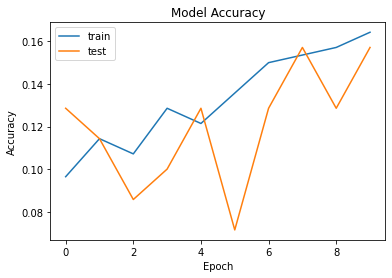

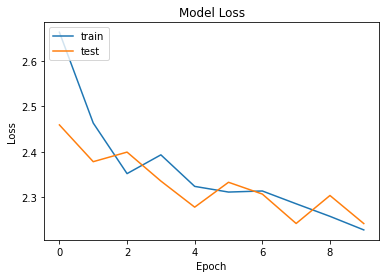

3/3 [==============================] - 0s 4ms/step - loss: 2.2426 - accuracy: 0.1571


[2.242588996887207, 0.15714286267757416]

In [29]:
import matplotlib.pyplot as plt

# Train the model
history = model.fit(train_ds, validation_data=test_ds, epochs=10)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluate the model
model.evaluate(test_ds)

### Build ANN.2 Model for betther accuracy

In [5]:
# Define the ANN architecture
#arch 2
model_ann = models.Sequential([
    layers.Flatten(input_shape=(img_height, img_width, 1)),
    layers.Dense(64, activation='relu'), # with little more diffrence
    layers.Dense(10, activation='softmax')
])

# Compile the model
model_ann.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
model_ann.fit(train_ds, epochs=10)

# Evaluate the model on the test set
_, accuracy_ann = model_ann.evaluate(test_ds)
print("Accuracy of ANN without data augmentation:", accuracy_ann)

Epoch 1/10
9/9 [==============================] - 1s 4ms/step - loss: 2.5689 - accuracy: 0.0893
Epoch 2/10
9/9 [==============================] - 0s 2ms/step - loss: 2.3381 - accuracy: 0.1071
Epoch 3/10
9/9 [==============================] - 0s 2ms/step - loss: 2.3408 - accuracy: 0.1143
Epoch 4/10
9/9 [==============================] - 0s 2ms/step - loss: 2.3018 - accuracy: 0.1429
Epoch 5/10
9/9 [==============================] - 0s 2ms/step - loss: 2.2904 - accuracy: 0.1393
Epoch 6/10
9/9 [==============================] - 0s 2ms/step - loss: 2.2931 - accuracy: 0.1179
Epoch 7/10
9/9 [==============================] - 0s 2ms/step - loss: 2.2738 - accuracy: 0.1179
Epoch 8/10
9/9 [==============================] - 0s 2ms/step - loss: 2.2738 - accuracy: 0.1179
Epoch 9/10
9/9 [==============================] - 0s 2ms/step - loss: 2.2685 - accuracy: 0.1286
Epoch 10/10
3/3 [==============================] - 0s 4ms/step - loss: 2.2931 - accuracy: 0.1143
Accuracy of ANN without data augmentati

### Build CNN Model

In [7]:
import tensorflow as tf

num_classes = 10  # Number of output classes in Persian MNIST dataset

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_height, img_width, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
    
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
model.fit(train_ds, validation_data=test_ds, epochs=10)

# Evaluate the model
model.evaluate(test_ds)

Epoch 1/10


c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


9/9 [==============================] - 1s 35ms/step - loss: 2.3181 - accuracy: 0.0857 - val_loss: 2.3044 - val_accuracy: 0.1143
Epoch 2/10
9/9 [==============================] - 0s 18ms/step - loss: 2.2955 - accuracy: 0.0964 - val_loss: 2.3045 - val_accuracy: 0.0857
Epoch 3/10
9/9 [==============================] - 0s 22ms/step - loss: 2.2877 - accuracy: 0.1214 - val_loss: 2.2988 - val_accuracy: 0.1429
Epoch 4/10
9/9 [==============================] - 0s 18ms/step - loss: 2.2541 - accuracy: 0.2214 - val_loss: 2.2723 - val_accuracy: 0.1429
Epoch 5/10
9/9 [==============================] - 0s 21ms/step - loss: 2.2051 - accuracy: 0.1893 - val_loss: 2.2093 - val_accuracy: 0.2000
Epoch 6/10
9/9 [==============================] - 0s 16ms/step - loss: 2.1162 - accuracy: 0.3143 - val_loss: 2.1156 - val_accuracy: 0.2143
Epoch 7/10
9/9 [==============================] - 0s 16ms/step - loss: 1.9654 - accuracy: 0.3357 - val_loss: 1.9502 - val_accuracy: 0.3429
Epoch 8/10
9/9 [======================

[1.6398062705993652, 0.5]

### Plot the CNN Model Error

Epoch 1/10
9/9 [==============================] - 1s 31ms/step - loss: 2.3198 - accuracy: 0.0714 - val_loss: 2.3012 - val_accuracy: 0.1000
Epoch 2/10
9/9 [==============================] - 0s 16ms/step - loss: 2.2948 - accuracy: 0.1357 - val_loss: 2.2922 - val_accuracy: 0.1714
Epoch 3/10
9/9 [==============================] - 0s 16ms/step - loss: 2.2804 - accuracy: 0.1571 - val_loss: 2.2849 - val_accuracy: 0.1857
Epoch 4/10
9/9 [==============================] - 0s 25ms/step - loss: 2.2507 - accuracy: 0.2143 - val_loss: 2.2432 - val_accuracy: 0.2429
Epoch 5/10
9/9 [==============================] - 0s 24ms/step - loss: 2.1848 - accuracy: 0.2321 - val_loss: 2.1735 - val_accuracy: 0.2143
Epoch 6/10
9/9 [==============================] - 0s 15ms/step - loss: 2.0833 - accuracy: 0.2321 - val_loss: 2.0676 - val_accuracy: 0.1857
Epoch 7/10
9/9 [==============================] - 0s 16ms/step - loss: 1.9595 - accuracy: 0.3107 - val_loss: 1.8967 - val_accuracy: 0.3571
Epoch 8/10
9/9 [===========

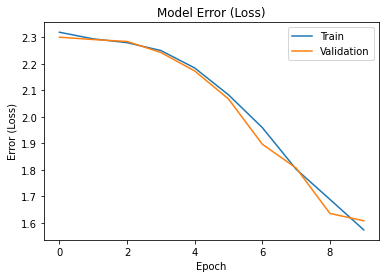

In [28]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Train the model
history = model.fit(train_ds, validation_data=test_ds, epochs=10)

# Plot the training and validation error (loss)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Error (Loss)')
plt.xlabel('Epoch')
plt.ylabel('Error (Loss)')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [9]:
# Define the CNN architecture
#not goof arch!
model_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
model_cnn.fit(train_ds, epochs=10)


# Evaluate the model on the test set
_, accuracy_cnn = model_cnn.evaluate(test_ds)
print("Accuracy of CNN without data augmentation:", accuracy_cnn)

Epoch 1/10
9/9 [==============================] - 1s 7ms/step - loss: 2.3918 - accuracy: 0.0964
Epoch 2/10
9/9 [==============================] - 0s 8ms/step - loss: 2.3036 - accuracy: 0.1036
Epoch 3/10
9/9 [==============================] - 0s 7ms/step - loss: 2.2978 - accuracy: 0.1071
Epoch 4/10
9/9 [==============================] - 0s 7ms/step - loss: 2.2897 - accuracy: 0.1607
Epoch 5/10
9/9 [==============================] - 0s 7ms/step - loss: 2.2864 - accuracy: 0.1036
Epoch 6/10
9/9 [==============================] - 0s 7ms/step - loss: 2.2752 - accuracy: 0.1714
Epoch 7/10
9/9 [==============================] - 0s 8ms/step - loss: 2.2644 - accuracy: 0.1571
Epoch 8/10
9/9 [==============================] - 0s 8ms/step - loss: 2.2489 - accuracy: 0.2107
Epoch 9/10
9/9 [==============================] - 0s 7ms/step - loss: 2.2382 - accuracy: 0.1821
Epoch 10/10
3/3 [==============================] - 0s 4ms/step - loss: 2.2524 - accuracy: 0.2429
Accuracy of CNN without data augmentati